# Практическая работа №3

## Импорт библиотек

In [7]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

## 1. Построение распределений 

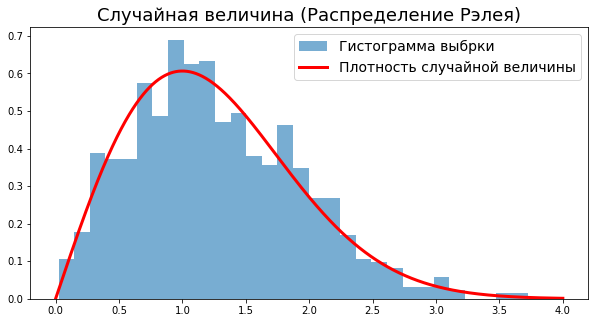

In [13]:
X = sps.rayleigh
sample = X.rvs(size = 1000)
grid = np.linspace(0, 4, 1000)
plt.figure(figsize=(10, 5))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выбрки')
plt.plot(grid, X.pdf(grid), color='r', lw=3, label='Плотность случайной величины')
plt.title('Случайная величина (Распределение Рэлея)', fontsize=18)
plt.legend(fontsize=14)
plt.show()

## 2. Построение графика по функции

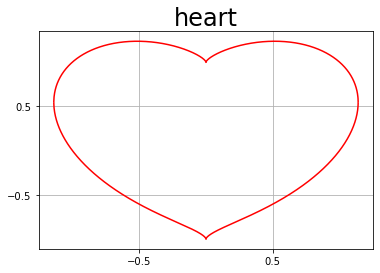

In [4]:
plt.title('heart', fontsize=24)
x = np.arange(-10, 10, 0.001)
#y = np.arange(100, -100, 0.0001)
# Разделим функцию на две части
m = np.sqrt(np.power(-1*x, 4/3) - (4*np.square(-1*x)) + 4)
k = np.sqrt(np.power(x, 4/3) - (4*np.square(x)) + 4)
#np.sqrt(1-(3/4*np.square(x)))
y1 = 0.5*(np.power(np.abs(x), 2/3) + m)
y2 = 0.5*(np.power(np.abs(x), 2/3) - m)
y3 = 0.5*(np.power(np.abs(x), 2/3) + k)
y4 = 0.5*(np.power(np.abs(x), 2/3) - k)
# Установить масштаб и интервал координат по оси x и оси y
# Это не будет выглядеть хорошо, если вы не установите его самостоятельно
my_x_ticks = np.arange(-0.5, 1.5)
my_y_ticks = np.arange(-0.5, 1.5)
plt.plot(x, y1, color='r')
plt.plot(x, y2, color='r')
plt.plot(x, y3, color='r')
plt.plot(x, y4, color='r')
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.grid()
plt.show()

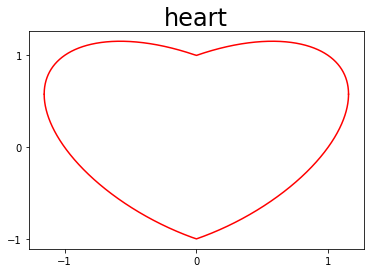

In [3]:
plt.title('heart', fontsize=24)
x = np.arange(-100, 100, 0.0001)
# Разделим функцию на две части
m = np.sqrt(1-(3/4*np.square(x)))
y1 = 0.5*np.abs(x) + m
y2 = 0.5*np.abs(x) - m
# Установить масштаб и интервал координат по оси x и оси y
# Это не будет выглядеть хорошо, если вы не установите его самостоятельно
my_x_ticks = np.arange(-1, 2)
my_y_ticks = np.arange(-1, 2)
plt.plot(x, y1, color='r')
plt.plot(x, y2, color='r')
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.show()

## 3. Датасет

In [2]:
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

In [5]:
with open('./dataset_home.txt', 'r') as file:
    for human in file.readlines():
        
        age.append(int(human.split(',')[0]))
       
        if human.split(',')[1] == 'male':
            sex.append(1)
        else:
            sex.append(0)
        
        bmi.append(float(human.split(',')[2]))
        children.append(int(human.split(',')[3]))
        
        if human.split(',')[4] == 'yes':
            smoker.append(1)
        else:
            smoker.append(0)
            
        if human.split(',')[5] == 'northwest':
            region.append(0)
        elif human.split(',')[5] == 'northeast':
            region.append(1)
        elif human.split(',')[5] == 'southwest':
            region.append(2)
        elif human.split(',')[5] == 'southeast':
            region.append(3)
        else:
            region.append(human.split(',')[5])
            
        charges.append(float(human.split(',')[6]))
        

In [8]:
age = np.array(age)
sex = np.array(sex)
bmi = np.array(bmi)
children = np.array(children)
smoker = np.array(smoker)
region = np.array(region)
charges = np.array(charges)

### Возраст (age)

In [23]:
print(f'Минимальный возраст в выборке: {age.min()}')
print(f'Максимальный возраст в выборке: {age.max()}')
print(f'Средний возраст в выборке: {round(age.mean())}')

Минимальный возраст в выборке: 18
Максимальный возраст в выборке: 64
Средний возраст в выборке: 38


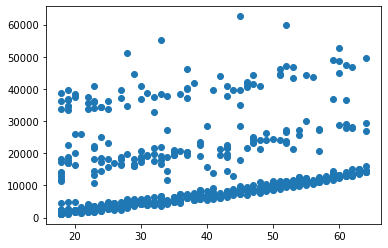

In [51]:
plt.scatter(age, charges)

In [70]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(age, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.25


In [94]:
age[age<36].shape

(307,)

In [96]:
age[age>35][age[age>35]<56].shape

(269,)

In [ ]:
age[age>55].shape

(94,)

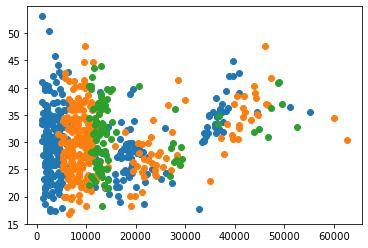

In [105]:
plt.scatter(charges[age<36], bmi[age<36])
plt.scatter(charges[age>35][age[age>35]<56], bmi[age>35][age[age>35]<56])
plt.scatter(charges[age>55], bmi[age>55])
plt.show()

### Индекс массы тела (bmi)

In [30]:
print(f'Минимальный индекс массы тела в выборке: {round(bmi.min(), 2)}')
print(f'Максимальный индекс массы тела в выборке: {round(bmi.max(), 2)}')
print(f'Средний индекс массы тела в выборке: {round(bmi.mean(), 2)}')

Минимальный индекс массы тела в выборке: 16.82
Максимальный индекс массы тела в выборке: 53.13
Средний индекс массы тела в выборке: 30.21


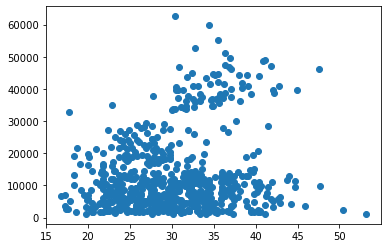

In [52]:
plt.scatter(bmi, charges)

In [71]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(bmi, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.19


### Количество детей (children)

In [29]:
print(f'Минимальное количество детей у людей из выборки: {round(children.min())}')
print(f'Максимальное количество детей у людей из выборки: {round(children.max())}')
print(f'Среднее количество детей у людей из выборки: {round(children.mean())}')

Минимальное количество детей у людей из выборки: 0
Максимальное количество детей у людей из выборки: 5
Среднее количество детей у людей из выборки: 1


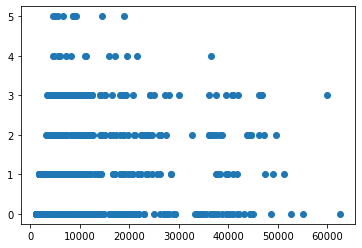

In [88]:
plt.scatter(charges, children)

In [83]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(children, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.06


### Пол (sex)

In [48]:
print(f'Количество мужчин в выборке: {sex[sex==1].shape[0]}')
print(f'Количество женщин в выборке: {sex[sex==0].shape[0]}')

Количество мужчин в выборке: 334
Количество женщин в выборке: 336


<BarContainer object of 670 artists>

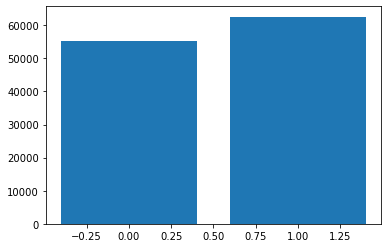

In [89]:
plt.bar(sex, charges)

In [85]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(sex, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.02


### Курящие (smoker)

In [45]:
print(f'Количество курящих в выборке: {smoker[smoker==1].shape[0]}')
print(f'Количество не курящих в выборке: {smoker[smoker==0].shape[0]}')

Количество курящих в выборке: 138
Количество не курящих в выборке: 532


<BarContainer object of 670 artists>

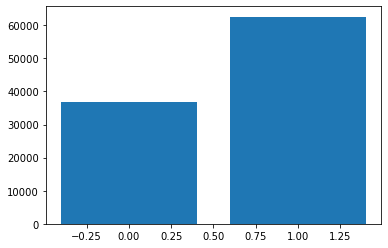

In [90]:
plt.bar(smoker, charges)

In [86]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(smoker, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.79


### Регион (region)

In [47]:
print(f'Количество людей в выборке с северо-запада: {region[region==0].shape[0]}')
print(f'Количество людей в выборке с северо-востока: {region[region==1].shape[0]}')
print(f'Количество людей в выборке с юго-запада: {region[region==2].shape[0]}')
print(f'Количество людей в выборке с юго-востока: {region[region==3].shape[0]}')

Количество людей в выборке с северо-запада: 176
Количество людей в выборке с северо-востока: 161
Количество людей в выборке с юго-запада: 166
Количество людей в выборке с юго-востока: 167


<BarContainer object of 670 artists>

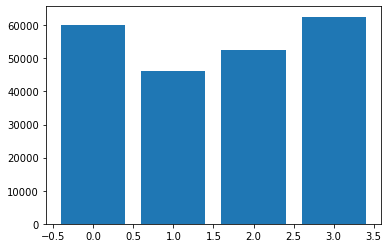

In [92]:
plt.bar(region, charges)

In [87]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(region, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.08


### Затраты на страховку (charges)

In [49]:
print(f'Минимальный размер денежных затрат на страхование: {round(charges.min(), 2)}')
print(f'Максимальный размер денежных затрат на страхование: {round(charges.max(), 2)}')
print(f'Средний размер денежных затрат на страхование: {round(charges.mean(), 2)}')

Минимальный размер денежных затрат на страхование: 1131.51
Максимальный размер денежных затрат на страхование: 62592.87
Средний размер денежных затрат на страхование: 12899.87


(array([136., 142.,  93.,  95.,  39.,  35.,  24.,  14.,  15.,   4.,  11.,
         18.,  17.,   7.,  10.,   5.,   2.,   1.,   0.,   2.]),
 array([ 1131.5066   ,  4204.5749245,  7277.643249 , 10350.7115735,
        13423.779898 , 16496.8482225, 19569.916547 , 22642.9848715,
        25716.053196 , 28789.1215205, 31862.189845 , 34935.2581695,
        38008.326494 , 41081.3948185, 44154.463143 , 47227.5314675,
        50300.599792 , 53373.6681165, 56446.736441 , 59519.8047655,
        62592.87309  ]),
 <BarContainer object of 20 artists>)

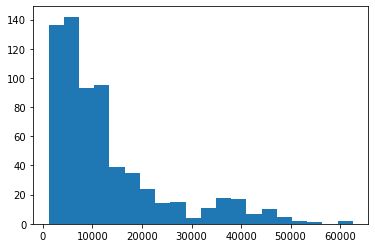

In [61]:
plt.hist(charges, bins=20)

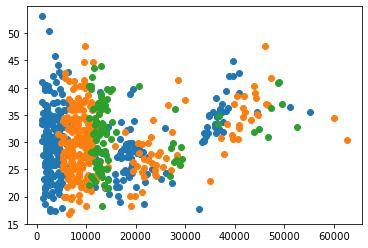

In [104]:
plt.scatter(charges[age<36], bmi[age<36])
plt.scatter(charges[age>35][age[age>35]<56], bmi[age>35][age[age>35]<56])
plt.scatter(charges[age>55], bmi[age>55])
plt.show()